<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/AlgoritmoEvolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax

In [3]:
def FuncionMinimizar(x):
  return x**2 + 10*np.sin(x)

In [10]:
class Robot:

  def __init__(self, f, Id=0):

    self.Id = Id
    self.f = f

    self.r = np.random.uniform(-10,10)

  # Getter de clase: Me da la posicion del robot
  def GetR(self):
    return self.r

  # Buscamos la posibilidad de mejorar (Mutar)
  def Mutate(self):
    # Cambiar el lugar donde estoy aleatoriamente
    self.r += np.random.uniform(-0.1,0.1)
    #print(self.Id,self.r)

  def SetFitness(self):
    self.fitness = self.f(self.r)

  @property
  def Fitness(self):
    return self.fitness

  def __repr__(self):
    return f"Robot {self.Id}"

In [11]:
r = Robot(FuncionMinimizar)
r.GetR()

0.4357987351666033

In [12]:
# Queremos guardar los robots en una lista
def GetRobots(N):

  Robots = []

  for i in range(N):
    r = Robot(FuncionMinimizar,i)
    Robots.append(r)

  return Robots

In [13]:
Robots = GetRobots(10)

In [15]:
def Genetic(Robots, epochs=100):

  for e in range(epochs):

     # Plotting stuff
    clear_output(wait=True)
    _,ax = Plotter(e)

    # Mutar el genoma
    for i, p in enumerate(Robots):
      p.Mutate()
      p.SetFitness()

    # Queremos medir cual es más apto
    score = [ (p.Fitness, p) for p in Robots ]
    print(score)

    # Pintar los robots
    for i, p in enumerate(Robots):
      #print(i,p)
      ax.scatter(p.GetR(),p.f(p.GetR()),marker='.')

    plt.show()

[(89.36568137248952, Robot 0), (61.423656238331304, Robot 1), (51.65498356591064, Robot 2), (-0.7144406456760007, Robot 3), (8.586645585674363, Robot 4), (11.794527000033456, Robot 5), (85.44116616208649, Robot 6), (41.343044421706665, Robot 7), (22.200186992205175, Robot 8), (38.604885138020194, Robot 9)]


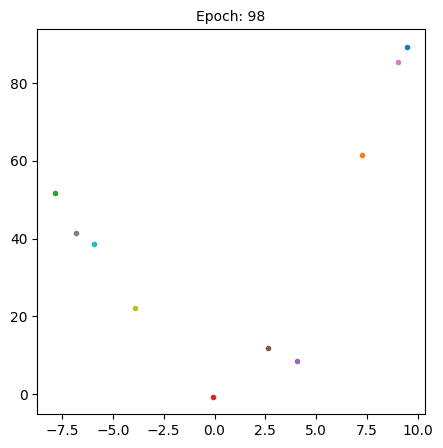

In [ ]:
Genetic(Robots)